# Fitting for the Hubble constant with supernovae

We will now use a linear $\chi^2$ fit with uncertainties to fit the Hubble constant again with the redshift of supernovae by using data from [here](http://dark.dark-cosmology.dk/~tamarad/SN/). 

In [1]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt

from chi_square_fit import chi_square_fit

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

Chi-square fit of supernova data to a straight line
Reference: https://people.smp.uq.edu.au/TamaraDavis/SN/
slope = 5.553327622696328 +- 0.025671639084390727
intercept = 44.15213014489616 +- 0.02203670747286835
chi-square/d.o.f. = 225.87106458594815 / 190 = 1.188795076768148


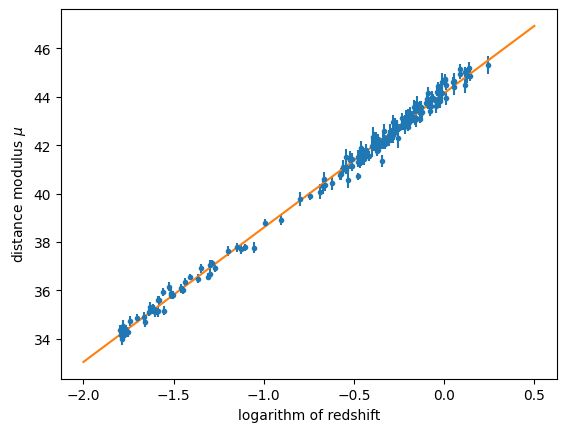

In [21]:
print ('Chi-square fit of supernova data to a straight line')
print ('Reference: https://people.smp.uq.edu.au/TamaraDavis/SN/')


data = np.genfromtxt(fname='Davis07_R07_WV07.dat', usecols=range(1,4),comments=';')


logz_data = np.log10(data[:,0])
mu_data = data[:,1]
mu_err_data = data[:,2]

selection = mu_err_data < 0.0000001
if mu_err_data[ selection ].any():
    print ('Error! Uncertainties are too small!')
    exit()

plt.errorbar( logz_data, mu_data , yerr=mu_err_data, fmt=".")

yint, slope, sigma_yint, sigma_slope, chi2 = chi_square_fit(logz_data, mu_data, mu_err_data)
print(f"slope = {slope} +- {sigma_slope}")
print(f"intercept = {yint} +- {sigma_yint}")

ndof = len(data) - 2
if ndof > 0:
    print (f"chi-square/d.o.f. = {chi2} / {ndof} = {chi2 / ndof}")
else :
    print ("chi-square/d.o.f. undefined")

logz_data_vals = np.linspace(-2,0.5,10)
fitline = yint + slope * logz_data_vals
plt.plot(logz_data_vals,fitline)
plt.xlabel("logarithm of redshift")
plt.ylabel(r"distance modulus $\mu$")
plt.show()

In [10]:
# p value of the fit
pval = 1. - scipy.stats.chi2.cdf(chi2, ndof)
print(f"p value = {pval}")

p value = 0.03841933059902314


In [29]:
# Convert to H0
# Use eqn 6.7 of https://people.ast.cam.ac.uk/~pettini/Intro%20Cosmology/Lecture06.pdf
c = 3.e5 # km/s
H0 = c * 10**((25 - yint) / 5)
print(H0)

44.32974424932744
